In [100]:
import numpy as np
import pandas as pd
import sklearn as sk
import random
import math as mat
import imagehash
import matplotlib.pyplot as plt

In [101]:
path = r'C:\Users\SUB\Desktop\Диплом\memsgenerator\memegenerator1.csv'
df = pd.read_csv(path, sep=',', encoding ='utf-16')

In [5]:
#считаем хэш
from PIL import Image
imgH = []
for i in df['Meme ID']:
    path_to_image = r'D:\memes\{}.jpg'.format(i)
    j = imagehash.phash(Image.open(path_to_image))
    imgH.append(np.ndarray.flatten(j.hash))
#df['Hash']=imgH

In [6]:
from sklearn.neighbors import BallTree
from sklearn.neighbors import DistanceMetric
metrics=DistanceMetric.get_metric('hamming')
tree = BallTree(imgH, metric=metrics)

In [115]:
def RecPrec(N,xstart=1,xfinish=40):# номер картинки,от, до, шаг, 
    valueRec=[]
    valuePrec=[]
    indRadius=[]
    tmpltNme = df['Base Meme Name'][N] #название шаблона
    lenoftmplt = len(df[df['Base Meme Name']== tmpltNme])#кол-во картинок с базовым шаблоном в фрейме
    
    for radius in np.arange(xstart, xfinish):
        ind = tree.query_radius(imgH[N:N+1], r=radius/64)  #индексы похожих эл-ов
        sumrecall=0
        sumprecisition=0
        for i in ind[0]:
            if(df['Base Meme Name'][i]== tmpltNme): #мемы, название которых совпадает с шаблоном
                sumrecall+=1
            else:
                sumprecisition+=1
            
        valueRec.append(sumrecall/lenoftmplt)
        valuePrec.append(sumprecisition/len(ind[0]))
        indRadius.append(radius)
    plt.plot(indRadius,valueRec,color = 'red')#recall красный
    plt.plot(indRadius,valuePrec,color = 'blue')#precisition голубой
    plt.xlabel('Радиус')

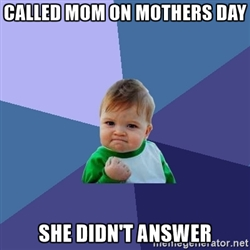

In [104]:
#исходный мем
from IPython.display import Image
path_to_image = "D:\memes\{}.jpg".format(df['Meme ID'][25931])
Image(filename = path_to_image, width=100, height=100)

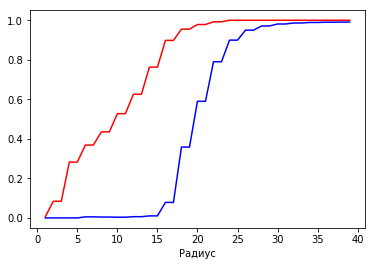

In [116]:
RecPrec(25931)#recall красный, precisition голубой

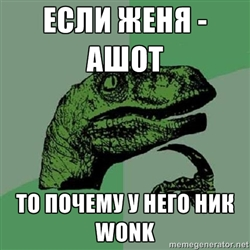

In [17]:
path_to_image = "D:\memes\{}.jpg".format(df['Meme ID'][7])
Image(filename = path_to_image, width=100, height=100)

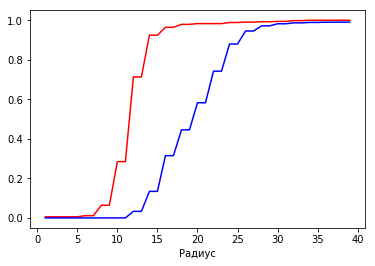

In [117]:
RecPrec(7)#recall красный, precisition голубой

In [129]:
#проверка с чистым шаблоном
from PIL import Image
path_to_image = r'C:\Users\SUB\Desktop\Диплом\memes\philosoraptor.jpg'
j = imagehash.phash(Image.open(path_to_image))
imgT = np.concatenate((j.hash[0:8]),axis=0)

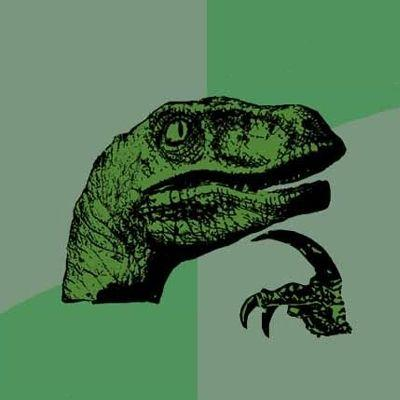

In [130]:
from IPython.display import Image
Image(filename = path_to_image, width=100, height=100)

Text(0.5, 0, 'Радиус')

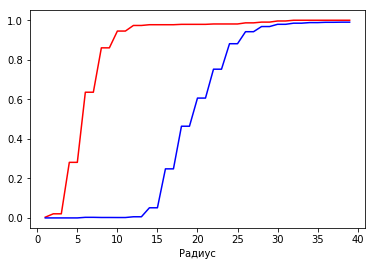

In [132]:
valueRec=[]
valuePrec=[]
indRadius=[]
tmpltNme = 'Philosoraptor' #название шаблона
lenoftmplt = len(df[df['Base Meme Name']==tmpltNme])#кол-во картинок с базовым шаблоном в фрейме
    
for radius in np.arange(1, 40):
    ind = tree.query_radius([imgT], r=radius/64)  #индексы похожих эл-ов
    sumrecall=0
    sumprecisition=0
    for i in ind[0]:
        if(df['Base Meme Name'][i]== tmpltNme): #мемы, название которых совпадает с шаблоном
            sumrecall+=1
        else:
            sumprecisition+=1
            
    valueRec.append(sumrecall/lenoftmplt)
    valuePrec.append(sumprecisition/len(ind[0]))
    indRadius.append(radius)
plt.plot(indRadius,valueRec,color = 'red')#recall красный
plt.plot(indRadius,valuePrec,color = 'blue')#precisition голубой
plt.xlabel('Радиус')